# Exploratory Data Analysis: Images

## Content

* Libraries
* Image Processing
* Exploratory Data Analysis
* Baseline model (considering that there is a class imbalance)
* Undersampling

## Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

from skimage import exposure, io, img_as_float
from skimage.feature import hog
from skimage.filters import gabor
from sklearn.utils import resample

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from torchvision import transforms

## Image processing

In [7]:
# Define the folder that contains the images
input_folder = 'C:/Users/maria/OneDrive/Escritorio/ITAM/Mineria/cancer/im'
output_folder = 'C:/Users/maria/OneDrive/Escritorio/ITAM/Mineria/cancer_cropped'

# Create output folder if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Desired size (width, height)
target_size = (100, 100)  

# Image cropping function
def crop_image(image):
    width, height = image.size
    new_width, new_height = target_size

    # Calculate the clipping
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2

    # Crop the image
    return image.crop((left, top, right, bottom))

# Process each image in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # Crop and save the image
        cropped_image = crop_image(image)
        cropped_image.save(os.path.join(output_folder, filename))

print("Recorte completado.")

Recorte completado.


## Exploratory Data Analysis

* This part of the EDA runs a workflow to load, process and analyze images in terms of intensity histograms, histogram equalization, HoG descriptors and GIST features using Gabor filters.

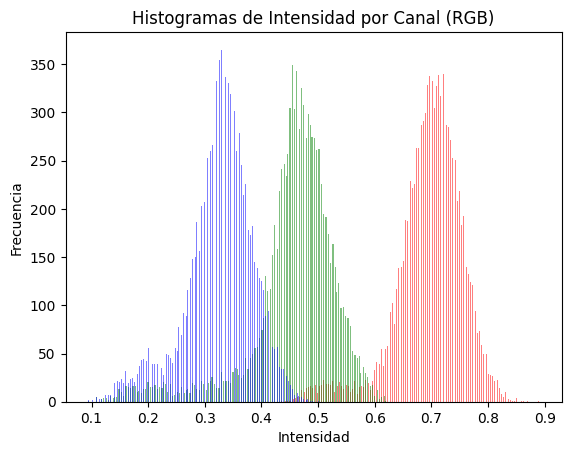

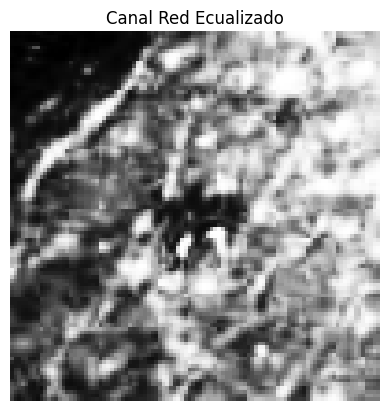

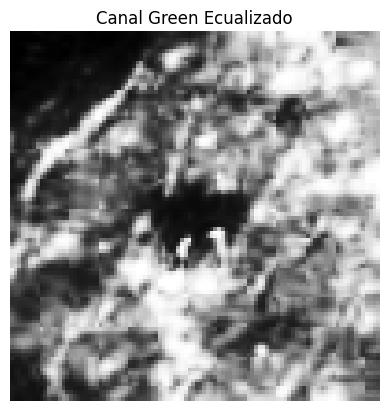

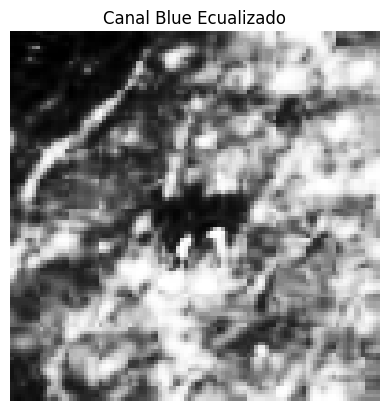

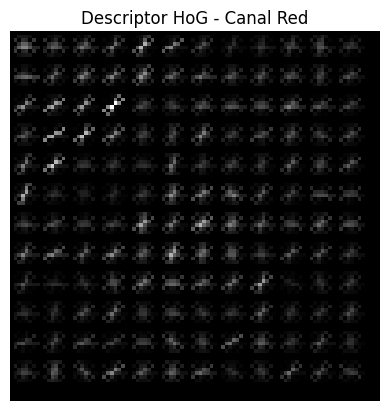

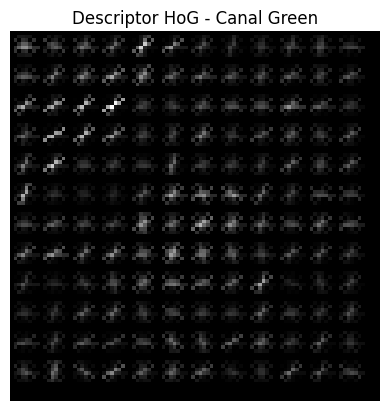

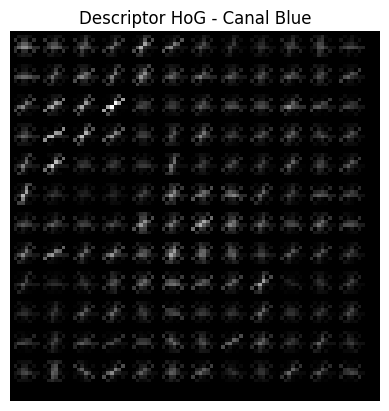

Características GIST - Canal Red: [0.0006702071532618005, 0.0011630067377914502, 0.0027451109034871382, 0.22280063512018963, 0.00041573371105160524, 0.0007926804160311712, 0.0014299041738276457, 0.004913921837016684, 0.0006702071532617749, 0.0011630067377914539, 0.002745110903487115, 0.2228006351201896, 0.00040115817783626013, 0.0007909695625218909, 0.0014291997526710985, 0.004913918595755355]
Características GIST - Canal Green: [0.0006702071532618005, 0.0011630067377914502, 0.0027451109034871382, 0.22280063512018963, 0.00041573371105160524, 0.0007926804160311712, 0.0014299041738276457, 0.004913921837016684, 0.0006702071532617749, 0.0011630067377914539, 0.002745110903487115, 0.2228006351201896, 0.00040115817783626013, 0.0007909695625218909, 0.0014291997526710985, 0.004913918595755355, 0.0004381370076169138, 0.0007602967074498057, 0.0017945715305736193, 0.14565228540402636, 0.00027774228098456535, 0.000518644923659026, 0.0009349803227963161, 0.003212397331281316, 0.0004381370076169162, 

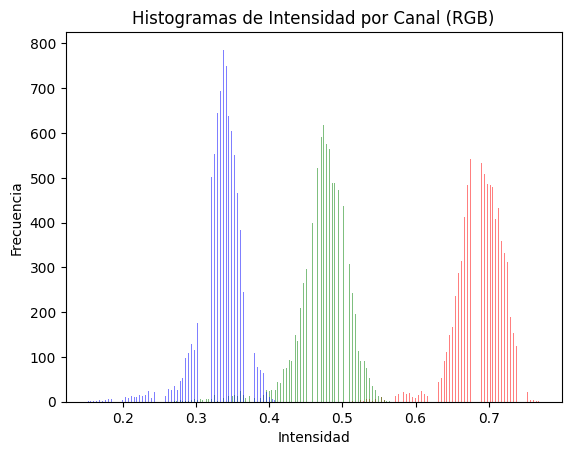

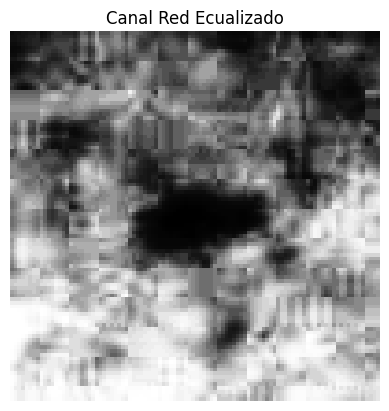

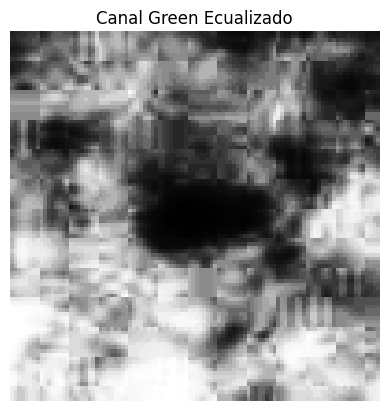

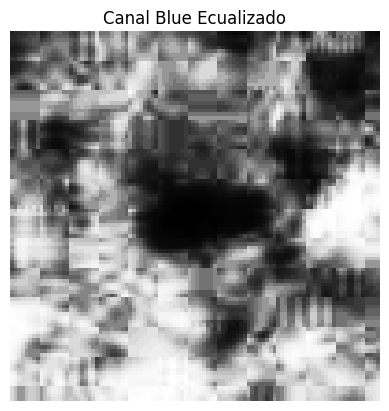

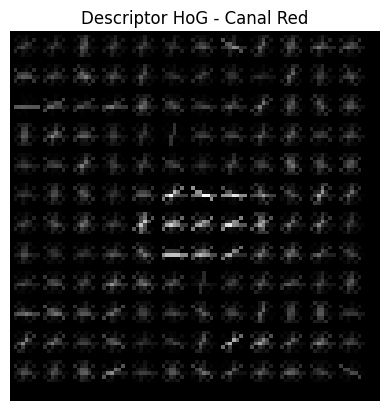

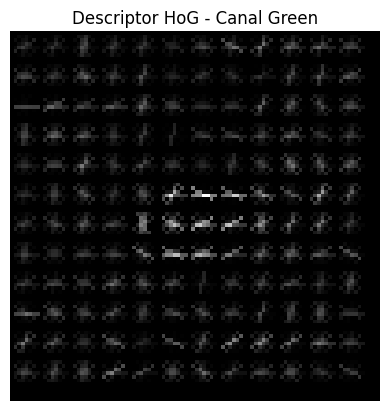

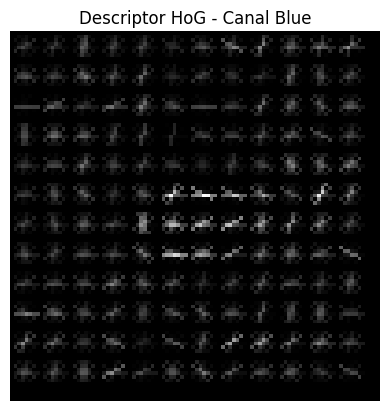

Características GIST - Canal Red: [0.0006612698099829784, 0.0011474978158101837, 0.0027085043134746373, 0.21982954513835712, 0.0004006622897129189, 0.000781234899979895, 0.0014105008764335749, 0.0048483921913942555, 0.0006612698099829498, 0.001147497815810189, 0.0027085043134746113, 0.21982954513835706, 0.00040533618629932564, 0.000781296796825586, 0.0014104763408282046, 0.004848392069849788]
Características GIST - Canal Green: [0.0006612698099829784, 0.0011474978158101837, 0.0027085043134746373, 0.21982954513835712, 0.0004006622897129189, 0.000781234899979895, 0.0014105008764335749, 0.0048483921913942555, 0.0006612698099829498, 0.001147497815810189, 0.0027085043134746113, 0.21982954513835706, 0.00040533618629932564, 0.000781296796825586, 0.0014104763408282046, 0.004848392069849788, 0.0004566860895988988, 0.0007924848260335937, 0.0018705469763005207, 0.1518186583327085, 0.0002736709309421887, 0.0005394369845014386, 0.0009740774313673573, 0.0033483959028346964, 0.00045668608959890814, 0

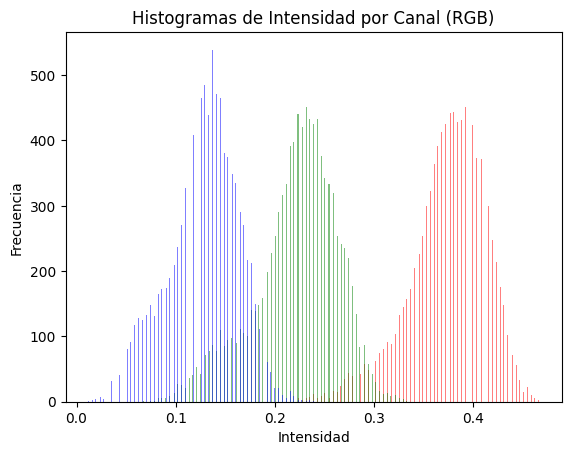

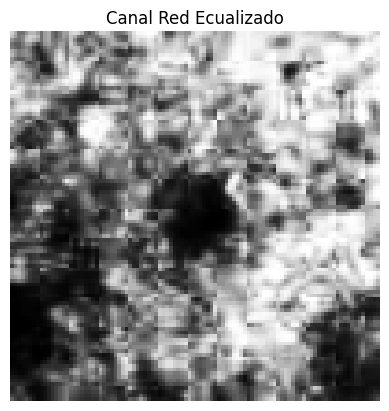

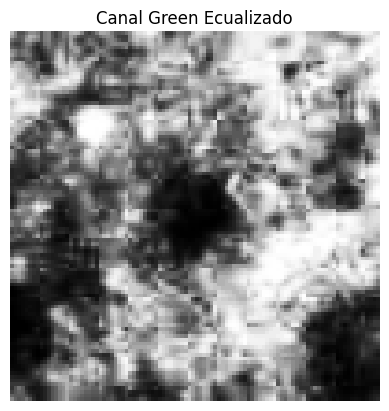

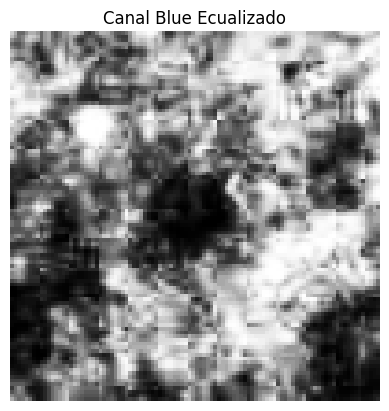

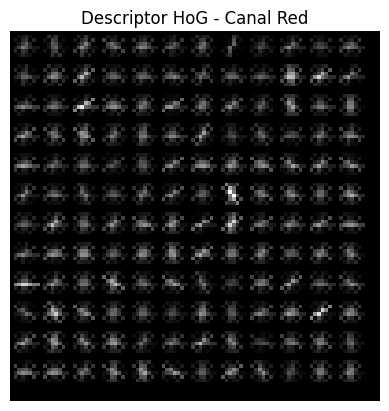

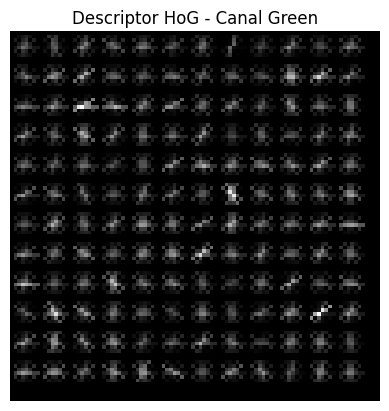

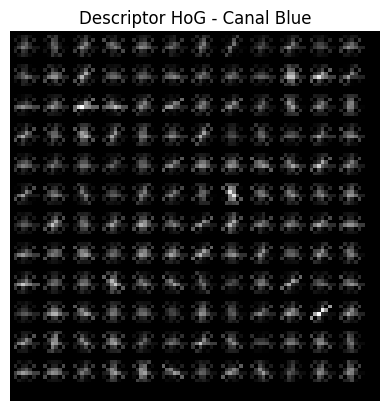

Características GIST - Canal Red: [0.00036053851138990534, 0.0006256404694265706, 0.0014767347586886154, 0.11985579224574494, 0.00022588620195298264, 0.0004256174183530155, 0.0007689735725782923, 0.0026434475474871534, 0.0003605385113898904, 0.0006256404694265706, 0.0014767347586886036, 0.1198557922457449, 0.00021356148844054265, 0.00042630844225793673, 0.0007690838303486274, 0.0026434476200209098]
Características GIST - Canal Green: [0.00036053851138990534, 0.0006256404694265706, 0.0014767347586886154, 0.11985579224574494, 0.00022588620195298264, 0.0004256174183530155, 0.0007689735725782923, 0.0026434475474871534, 0.0003605385113898904, 0.0006256404694265706, 0.0014767347586886036, 0.1198557922457449, 0.00021356148844054265, 0.00042630844225793673, 0.0007690838303486274, 0.0026434476200209098, 0.00021319801806511985, 0.0003699613325324528, 0.0008732407601799995, 0.07087458496987926, 0.00013978765267760464, 0.00025172506438128, 0.0004547889518195774, 0.0015631560294433657, 0.0002131980

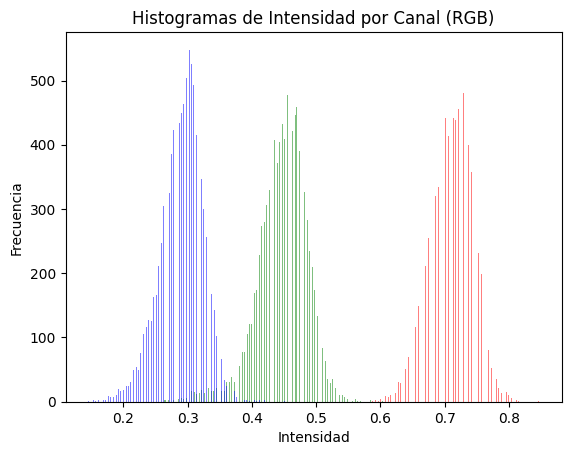

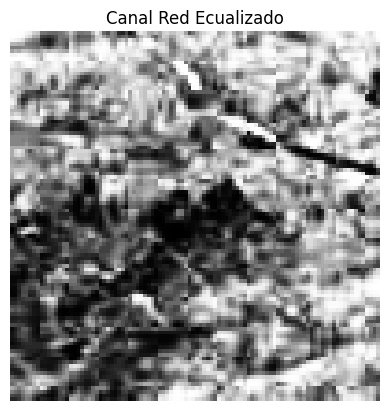

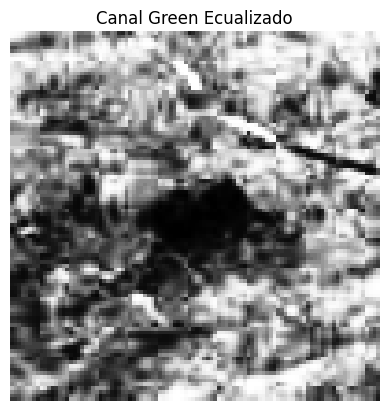

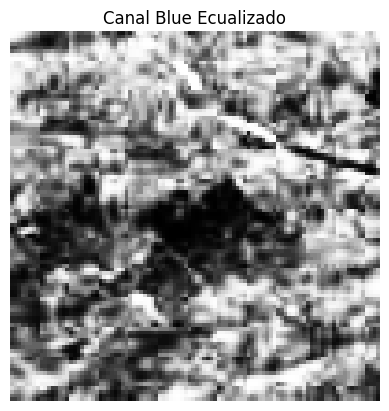

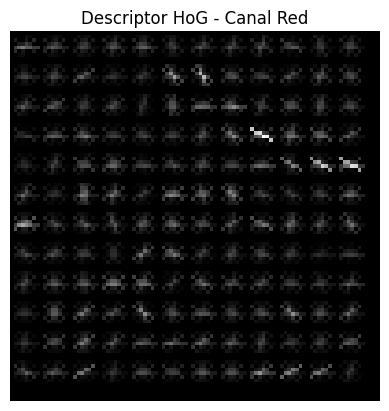

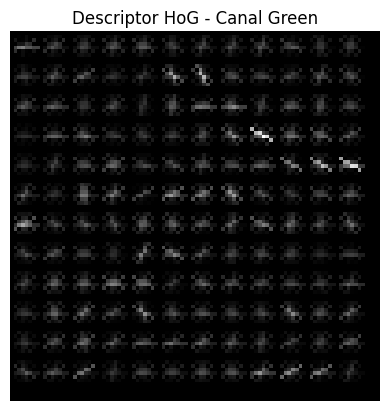

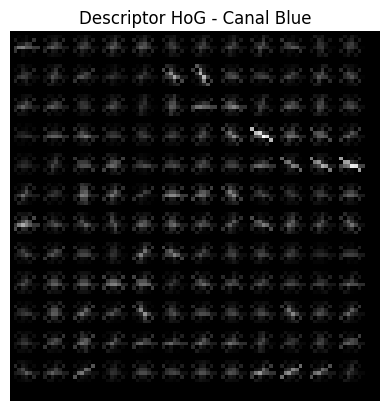

Características GIST - Canal Red: [0.000683324842436218, 0.0011857697907070365, 0.002798839831037369, 0.22716142038657408, 0.00041398665457465775, 0.0008072734443968539, 0.0014575417510186265, 0.005010098147352761, 0.0006833248424361868, 0.001185769790707041, 0.0027988398310373436, 0.22716142038657403, 0.00041889392353471446, 0.0008073726643506255, 0.0014575222416218134, 0.005010098567242669]
Características GIST - Canal Green: [0.000683324842436218, 0.0011857697907070365, 0.002798839831037369, 0.22716142038657408, 0.00041398665457465775, 0.0008072734443968539, 0.0014575417510186265, 0.005010098147352761, 0.0006833248424361868, 0.001185769790707041, 0.0027988398310373436, 0.22716142038657403, 0.00041889392353471446, 0.0008073726643506255, 0.0014575222416218134, 0.005010098567242669, 0.00043065940776358344, 0.0007473208700992085, 0.0017639439241844748, 0.143166465925096, 0.0002631284913098258, 0.0005089854241743066, 0.0009186979622586831, 0.003157570230368754, 0.0004306594077635789, 0.0

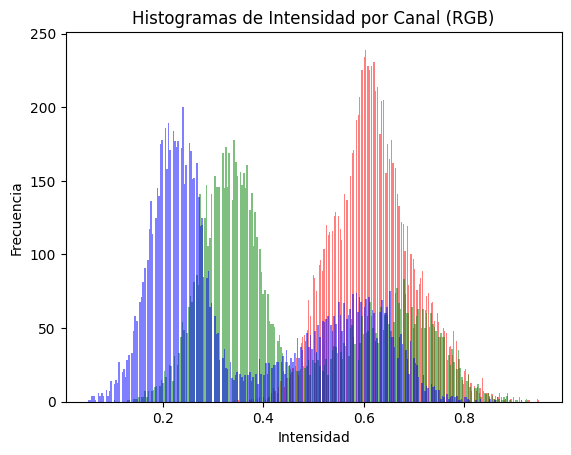

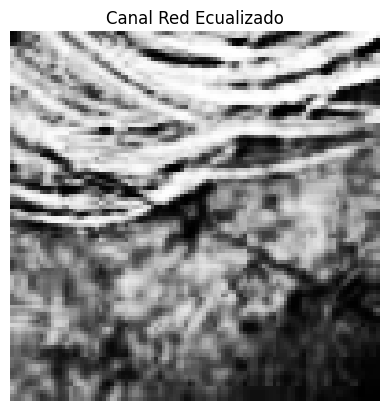

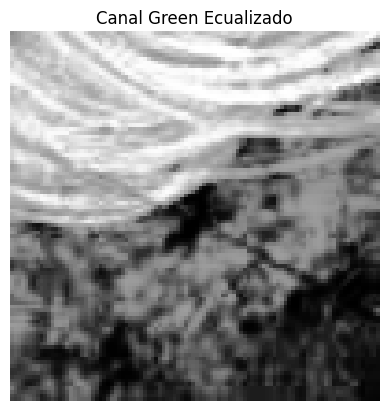

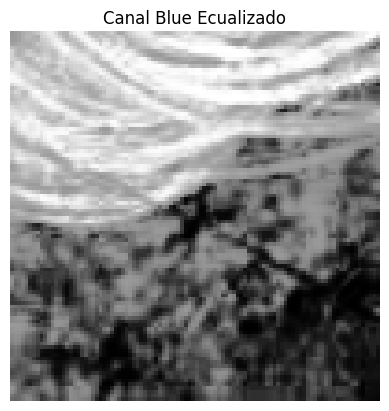

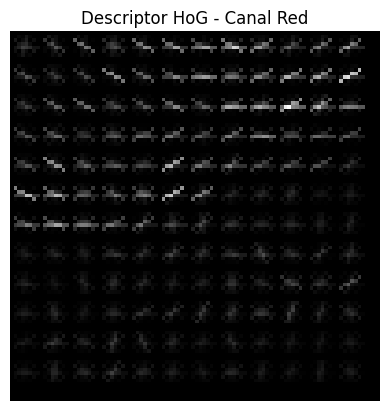

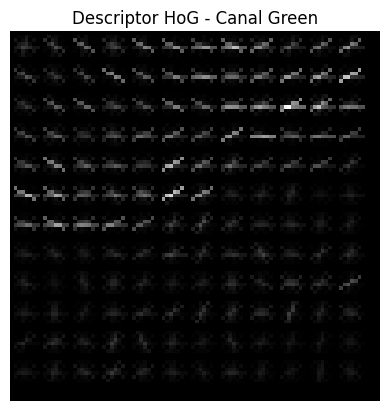

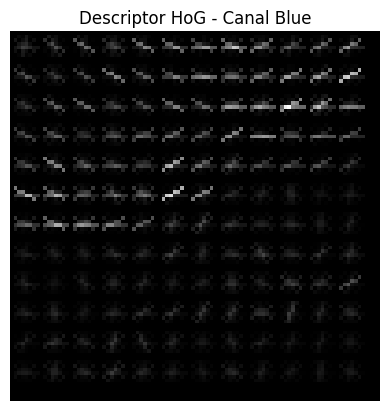

Características GIST - Canal Red: [0.0005961957462952082, 0.0010345751557698996, 0.002441966540945468, 0.1981966176935744, 0.0003937117311021717, 0.0007073111006126084, 0.0012725928025046518, 0.004371276974929191, 0.0005961957462952064, 0.0010345751557699005, 0.0024419665409454506, 0.19819661769357433, 0.0003329702611262179, 0.0007014553923123313, 0.001270778438608652, 0.004371268718249867]
Características GIST - Canal Green: [0.0005961957462952082, 0.0010345751557698996, 0.002441966540945468, 0.1981966176935744, 0.0003937117311021717, 0.0007073111006126084, 0.0012725928025046518, 0.004371276974929191, 0.0005961957462952064, 0.0010345751557699005, 0.0024419665409454506, 0.19819661769357433, 0.0003329702611262179, 0.0007014553923123313, 0.001270778438608652, 0.004371268718249867, 0.00043681350187927233, 0.0007580000353195674, 0.0017891505648116972, 0.14521230514195868, 0.00029293932941252166, 0.000518862831116978, 0.000932525382547329, 0.003202694936919194, 0.00043681350187926507, 0.000

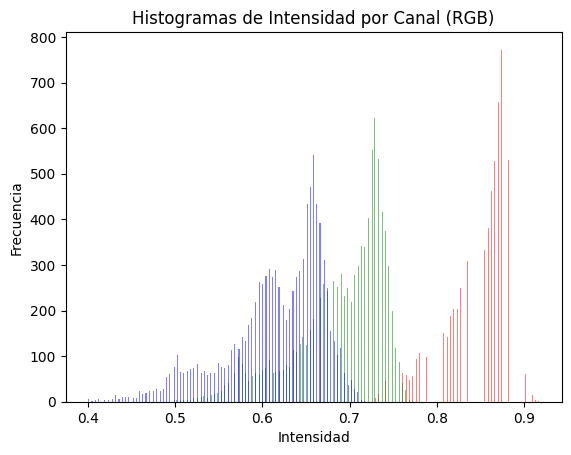

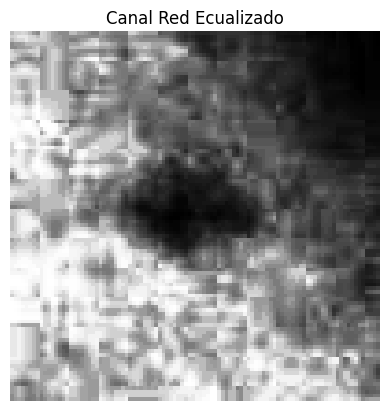

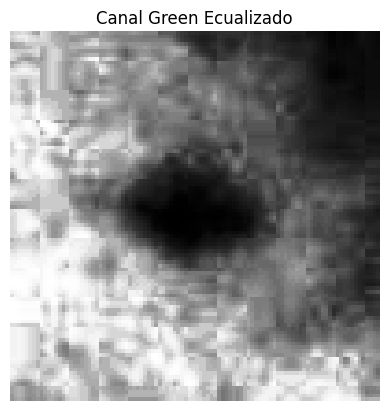

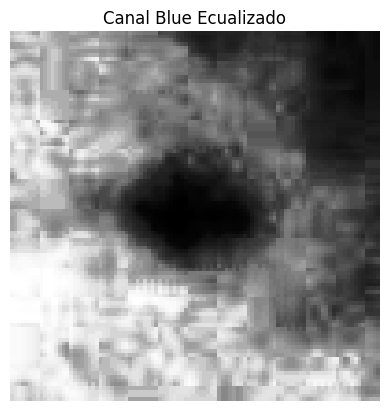

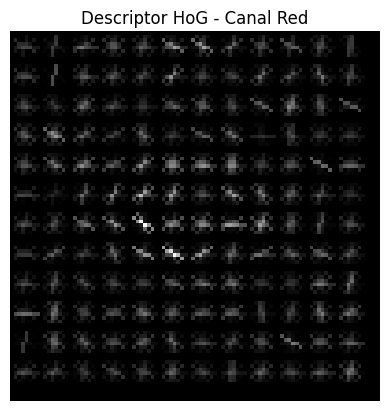

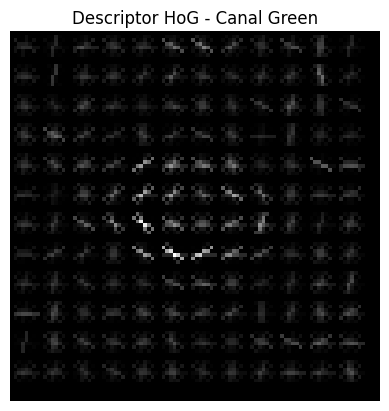

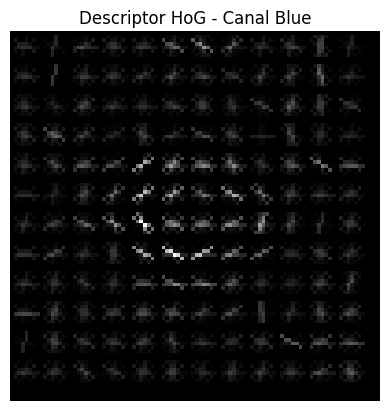

Características GIST - Canal Red: [0.0008171087423456742, 0.0014179242466024547, 0.003346807187943541, 0.27163593505508454, 0.0004932973254603003, 0.0009648581070721507, 0.0017426631350062002, 0.005990993039883774, 0.00081710874234564, 0.001417924246602454, 0.003346807187943521, 0.2716359350550845, 0.0005026477352764739, 0.000965909471270556, 0.0017431230167038003, 0.005990995360140711]
Características GIST - Canal Green: [0.0008171087423456742, 0.0014179242466024547, 0.003346807187943541, 0.27163593505508454, 0.0004932973254603003, 0.0009648581070721507, 0.0017426631350062002, 0.005990993039883774, 0.00081710874234564, 0.001417924246602454, 0.003346807187943521, 0.2716359350550845, 0.0005026477352764739, 0.000965909471270556, 0.0017431230167038003, 0.005990995360140711, 0.0006629544776798225, 0.0011504212102753627, 0.0027154045675839107, 0.22038958844884188, 0.00039895274465709575, 0.0007826517576520337, 0.0014138115190797365, 0.004860742644238228, 0.0006629544776798016, 0.00115042121

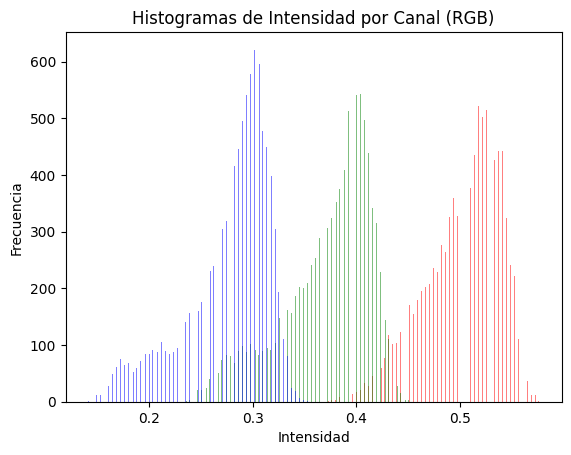

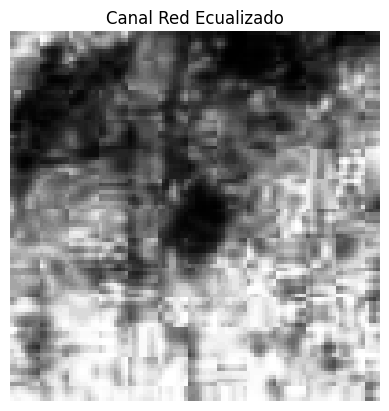

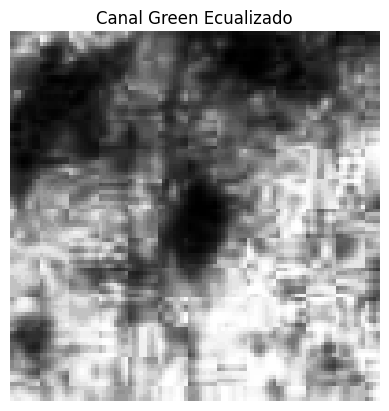

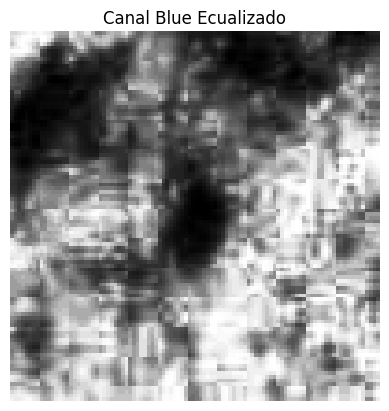

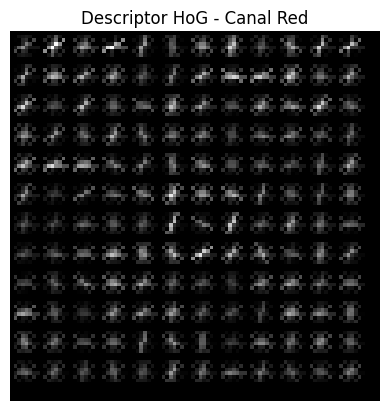

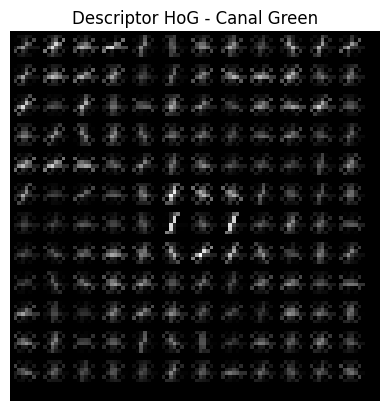

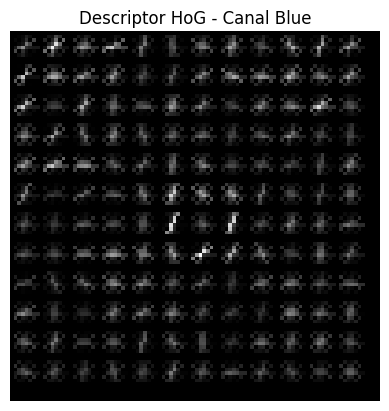

Características GIST - Canal Red: [0.0004834384918600722, 0.0008389081205783166, 0.0019801225169139088, 0.1607121059567328, 0.0002962430199018658, 0.0005711396261618411, 0.0010311886046456373, 0.0035445430248477925, 0.00048343849186008753, 0.0008389081205783156, 0.001980122516913893, 0.16071210595673274, 0.0002930031271359147, 0.0005711898066707953, 0.0010311601536014104, 0.0035445432881489715]
Características GIST - Canal Green: [0.0004834384918600722, 0.0008389081205783166, 0.0019801225169139088, 0.1607121059567328, 0.0002962430199018658, 0.0005711396261618411, 0.0010311886046456373, 0.0035445430248477925, 0.00048343849186008753, 0.0008389081205783156, 0.001980122516913893, 0.16071210595673274, 0.0002930031271359147, 0.0005711898066707953, 0.0010311601536014104, 0.0035445432881489715, 0.0003580518905443622, 0.0006213254501319766, 0.0014665497734005328, 0.11902915125721802, 0.0002168944034286372, 0.00042293663533469187, 0.0007637100034993904, 0.0026252155394643167, 0.00035805189054434

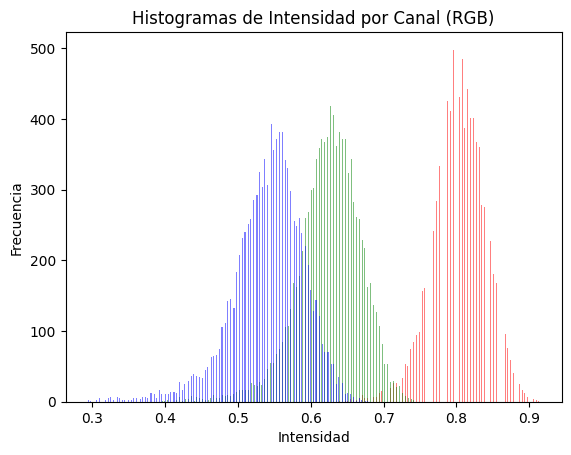

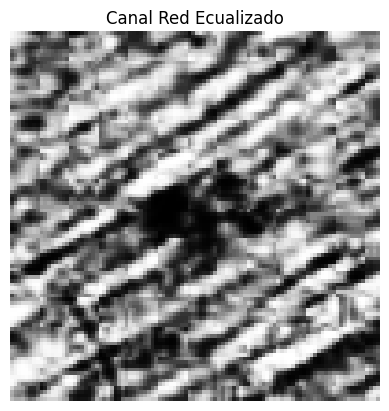

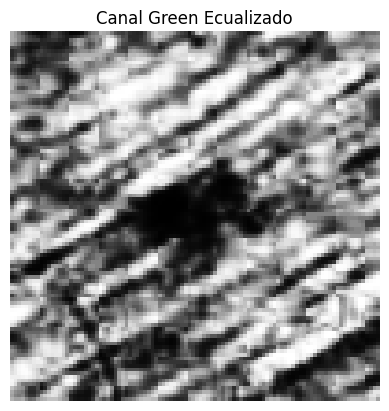

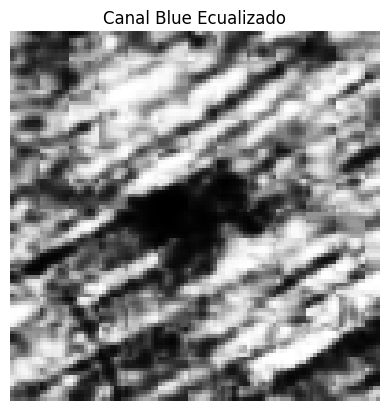

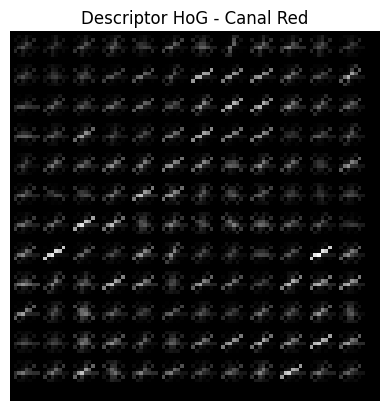

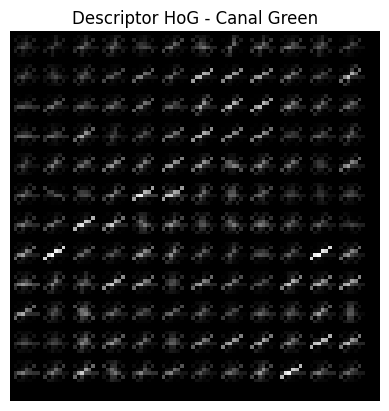

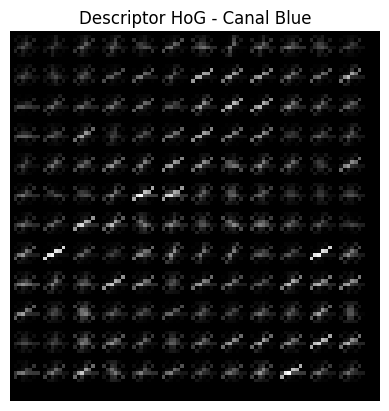

Características GIST - Canal Red: [0.0007730292460062755, 0.0013414333422728355, 0.003166261359041831, 0.2569823466348488, 0.00045750754004012694, 0.0009132848440138588, 0.001648869590997936, 0.005667805540980661, 0.0007730292460062446, 0.0013414333422728305, 0.003166261359041821, 0.25698234663484887, 0.0004847105754519262, 0.0009133261417100111, 0.0016488734154715182, 0.005667806206284711]
Características GIST - Canal Green: [0.0007730292460062755, 0.0013414333422728355, 0.003166261359041831, 0.2569823466348488, 0.00045750754004012694, 0.0009132848440138588, 0.001648869590997936, 0.005667805540980661, 0.0007730292460062446, 0.0013414333422728305, 0.003166261359041821, 0.25698234663484887, 0.0004847105754519262, 0.0009133261417100111, 0.0016488734154715182, 0.005667806206284711, 0.0006013082447918813, 0.0010434468459176998, 0.0024629068954298604, 0.19989619357330943, 0.0003559716470759306, 0.0007105667023297981, 0.001282657100748361, 0.00440875742285968, 0.0006013082447918761, 0.001043

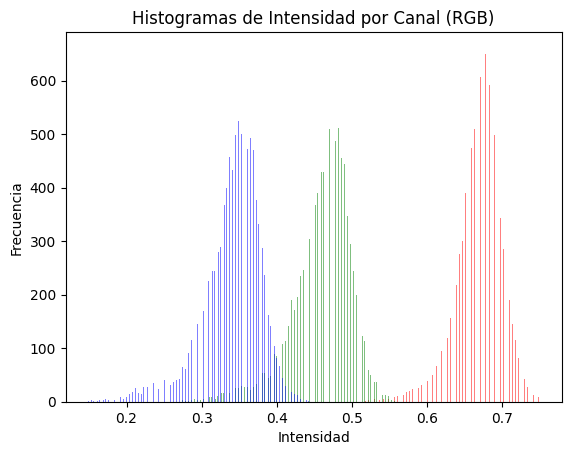

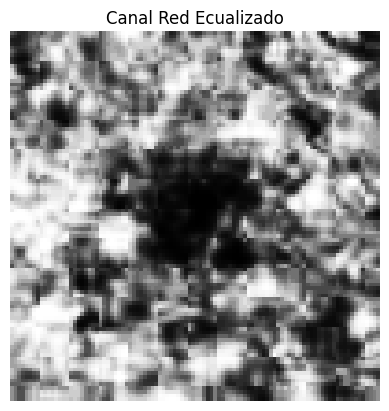

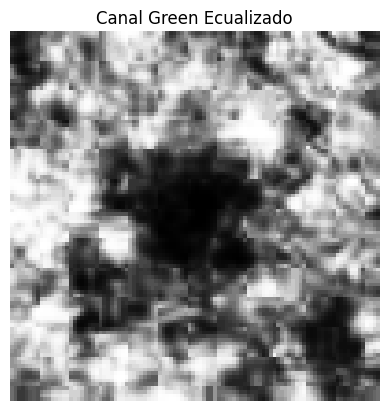

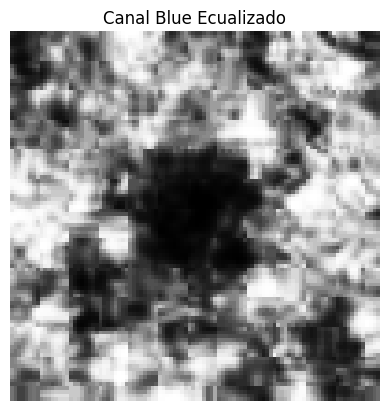

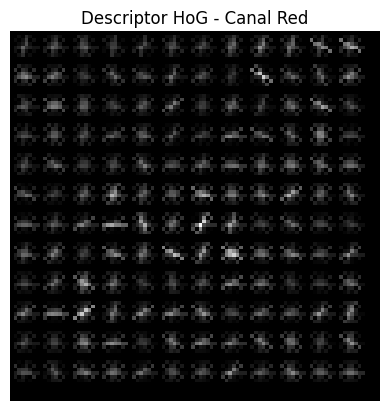

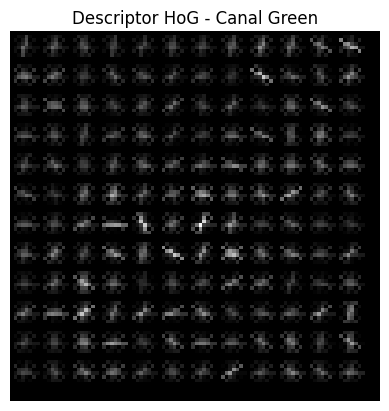

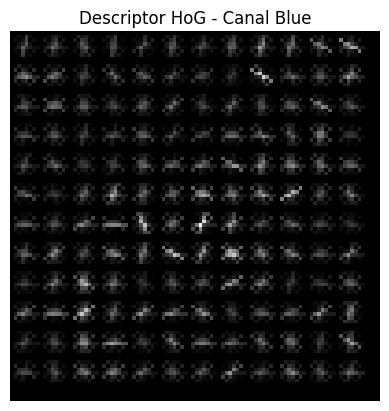

Características GIST - Canal Red: [0.0006439498863093772, 0.0011174426487884652, 0.0026375633945474445, 0.2140717880390318, 0.0003872716740612883, 0.0007606993769406023, 0.0013735300197511573, 0.00472140328887124, 0.0006439498863093552, 0.0011174426487884695, 0.0026375633945474194, 0.21407178803903176, 0.0003976161571357476, 0.0007609066200707946, 0.001373560397674407, 0.004721403608294359]
Características GIST - Canal Green: [0.0006439498863093772, 0.0011174426487884652, 0.0026375633945474445, 0.2140717880390318, 0.0003872716740612883, 0.0007606993769406023, 0.0013735300197511573, 0.00472140328887124, 0.0006439498863093552, 0.0011174426487884695, 0.0026375633945474194, 0.21407178803903176, 0.0003976161571357476, 0.0007609066200707946, 0.001373560397674407, 0.004721403608294359, 0.00044221998696551495, 0.0007673818787577748, 0.0018112950631023438, 0.1470096125940207, 0.00026685591114809857, 0.0005224781893864638, 0.0009432857342975108, 0.0032423315378597765, 0.0004422199869655159, 0.00

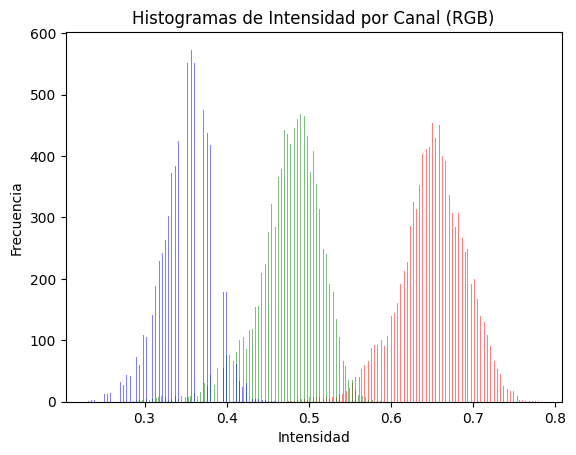

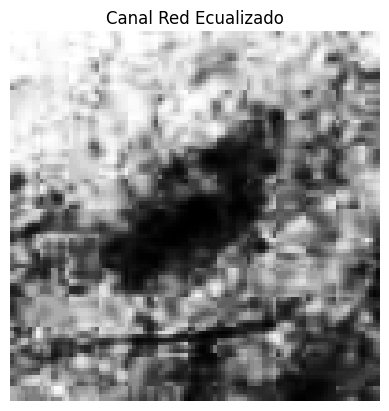

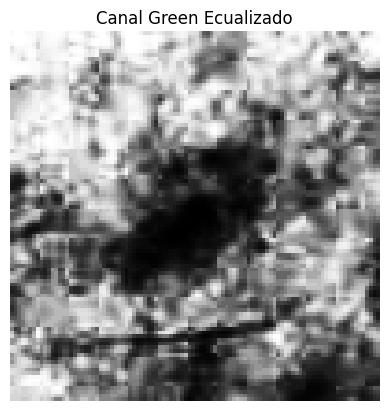

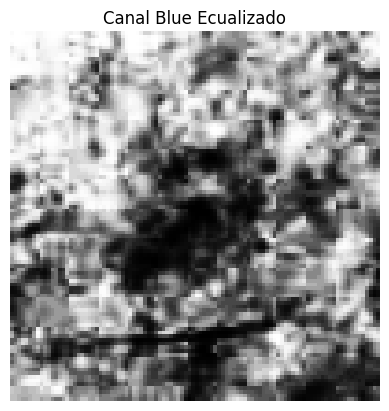

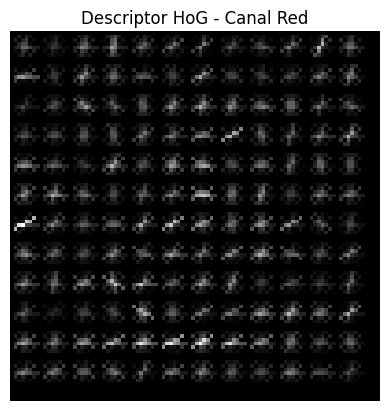

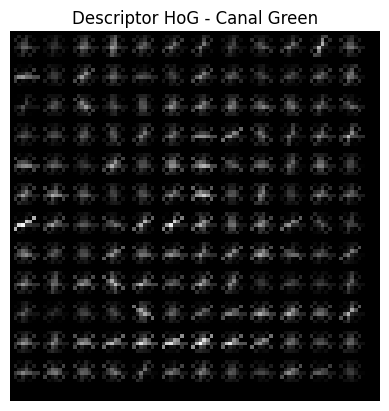

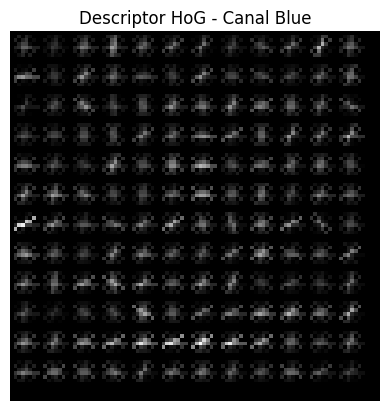

Características GIST - Canal Red: [0.0006263095587660124, 0.001086831486717254, 0.002565310128904577, 0.20820751732622053, 0.0003826901570664047, 0.0007404162442869015, 0.001336062042937323, 0.004592065999936133, 0.0006263095587659949, 0.0010868314867172586, 0.0025653101289045566, 0.20820751732622048, 0.0003806965003258341, 0.0007395069622622368, 0.0013357747316428983, 0.004592065167741543]
Características GIST - Canal Green: [0.0006263095587660124, 0.001086831486717254, 0.002565310128904577, 0.20820751732622053, 0.0003826901570664047, 0.0007404162442869015, 0.001336062042937323, 0.004592065999936133, 0.0006263095587659949, 0.0010868314867172586, 0.0025653101289045566, 0.20820751732622048, 0.0003806965003258341, 0.0007395069622622368, 0.0013357747316428983, 0.004592065167741543, 0.0004583579260453634, 0.0007953859545015028, 0.001877394674710933, 0.15237443608034457, 0.0002800444600673986, 0.0005420706245497214, 0.0009778798213859834, 0.0033606546135693293, 0.0004583579260453723, 0.0007

In [18]:
# Configuration: Images Directory
image_dir = "cancer_cropped"  # folder with all the images
all_image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

# Random selection of 10 images
sample_paths = random.sample(all_image_paths, 10)

# Function for loading and processing images
def load_images(paths):
    images = []
    for path in paths:
        img = io.imread(path) # HERE CHANGE THE FORMAT TO GRAYSCALE
        img = img_as_float(img)  # Convert to float in range [0, 1]
        images.append(img)
    return images

# Load the 10 randomly selected images
sample_images = load_images(sample_paths)

# Processing and visualization example
for img in sample_images:

    # Histogram display for each channel (Red, Green, Blue)
    colors = ('Red', 'Green', 'Blue')
    plt.figure()
    for i, color in enumerate(colors):
        plt.hist(img[:, :, i].ravel(), bins=256, color=color.lower(), alpha=0.5)
    plt.title("Histogramas de Intensidad por Canal (RGB)")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.show()

    # Histogram equalization for each channel separately and individual display
    eq_channels = []
    for i, color in enumerate(colors):  # Process each channel individually
        eq_img_channel = exposure.equalize_hist(img[:, :, i])
        eq_channels.append(eq_img_channel)
        
        # Display each equalized channel separately
        plt.imshow(eq_img_channel, cmap='gray')
        plt.title(f"Canal {color} Ecualizado")
        plt.axis('off')
        plt.show()

    # HoG Color Descriptor (per channel)
    for i, color in enumerate(colors):
        fd, hog_image = hog(img[:, :, i], pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                            block_norm='L2-Hys', visualize=True)
        
        # Display each HoG channel separately
        plt.imshow(hog_image, cmap='gray')
        plt.title(f"Descriptor HoG - Canal {color}")
        plt.axis('off')
        plt.show()

    # Approximate GIST descriptor with Gabor filters for each channel
    gist_features = []
    for i, color in enumerate(colors):  # Channel by channel
        for theta in range(4):  # Guidelines
            theta = theta / 4.0 * np.pi
            for frequency in (0.1, 0.3, 0.5, 0.7):  # Frequency scales
                real, imag = gabor(img[:, :, i], frequency=frequency, theta=theta)
                gist_features.append(real.mean())
        print(f"Características GIST - Canal {color}:", gist_features)

## Baseline model (considering that there is a class imbalance)

Epoch 1, Loss: 0.1677, Training Accuracy: 95.79%
Validation Accuracy: 96.05%
Epoch 2, Loss: 0.1401, Training Accuracy: 96.12%
Validation Accuracy: 96.10%
Epoch 3, Loss: 0.1306, Training Accuracy: 96.10%
Validation Accuracy: 96.20%
Epoch 4, Loss: 0.1251, Training Accuracy: 96.19%
Validation Accuracy: 96.15%
Epoch 5, Loss: 0.1261, Training Accuracy: 96.24%
Validation Accuracy: 96.20%


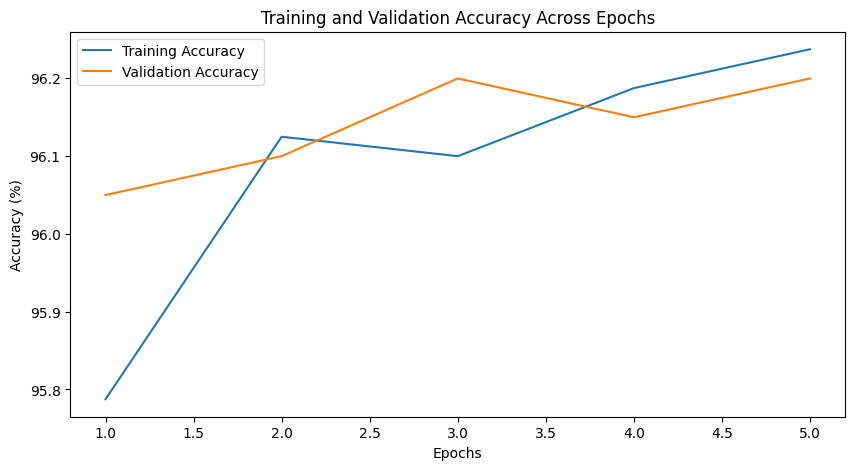

In [5]:
# Initialize lists to store metrics for plotting
train_accuracies = []
val_accuracies = []
train_losses = []

# Load the metadata
metadata_path = 'C:/Users/maria/OneDrive/Escritorio/ITAM/Mineria/cancer/df_datos.csv'
image_folder = 'C:/Users/maria/OneDrive/Escritorio/ITAM/Mineria/cancer_cropped/'
metadata_df = pd.read_csv(metadata_path)[['isic_id', 'target']]

# Custom Dataset Class
class SkinCancerDataset(Dataset):
    def __init__(self, metadata, image_dir, transform=None):
        self.metadata = metadata
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, f"{self.metadata.iloc[idx, 0]}.jpg")
        try:
            image = Image.open(img_name).convert('RGB')
            label = self.metadata.iloc[idx, 1]

            if self.transform:
                image = self.transform(image)

            return image, label
        except FileNotFoundError:
            return None

# Data Augmentation and Normalization
transform = transforms.Compose([
    transforms.Resize((100, 100)), # 127 x 127
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Filter dataset for non-None entries
dataset = SkinCancerDataset(metadata=metadata_df, image_dir=image_folder, transform=transform)
dataset = [item for item in dataset if item is not None]

# DataLoader
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False) # intentar con 32 después

# Define the CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 25 * 25, 128)
        self.fc2 = nn.Linear(128, 2)  # Binary classification

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 25 * 25)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize Model, Loss, and Optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop with Accuracy Calculation
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training pass
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate accuracy on training data
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for the epoch
    train_accuracy = 100 * correct_train / total_train
    train_loss = running_loss / len(train_loader)
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

    # Validation pass
    model.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate validation accuracy for the epoch
    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()
plt.show()

## Undersampling

Epoch 1, Loss: 0.7665, Training Accuracy: 62.74%
Validation Accuracy: 72.15%
Epoch 2, Loss: 0.5213, Training Accuracy: 74.20%
Validation Accuracy: 72.78%
Epoch 3, Loss: 0.4910, Training Accuracy: 77.39%
Validation Accuracy: 72.15%
Epoch 4, Loss: 0.4504, Training Accuracy: 79.78%
Validation Accuracy: 79.75%
Epoch 5, Loss: 0.4825, Training Accuracy: 76.43%
Validation Accuracy: 77.22%
Epoch 6, Loss: 0.4074, Training Accuracy: 81.69%
Validation Accuracy: 77.85%
Epoch 7, Loss: 0.3726, Training Accuracy: 85.19%
Validation Accuracy: 82.28%
Epoch 8, Loss: 0.3490, Training Accuracy: 85.83%
Validation Accuracy: 80.38%
Epoch 9, Loss: 0.3285, Training Accuracy: 86.31%
Validation Accuracy: 80.38%
Epoch 10, Loss: 0.3060, Training Accuracy: 88.06%
Validation Accuracy: 80.38%
Epoch 11, Loss: 0.2649, Training Accuracy: 89.65%
Validation Accuracy: 78.48%
Epoch 12, Loss: 0.2391, Training Accuracy: 90.61%
Validation Accuracy: 79.11%
Epoch 13, Loss: 0.2530, Training Accuracy: 90.76%
Validation Accuracy: 78

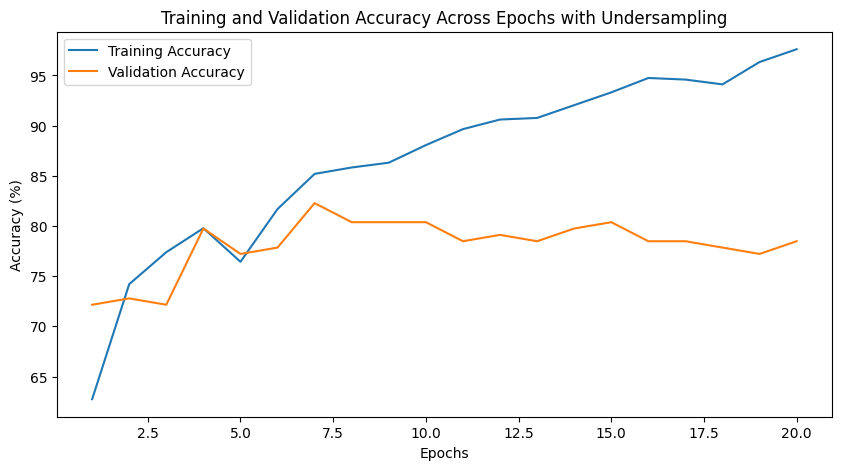

In [4]:
# Load the metadata and specify the image folder path
metadata_path = 'C:/Users/maria/OneDrive/Escritorio/ITAM/Mineria/cancer/df_datos.csv'
image_folder = 'C:/Users/maria/OneDrive/Escritorio/ITAM/Mineria/cancer_cropped/'
metadata_df = pd.read_csv(metadata_path)[['isic_id', 'target']]

# Step 1: Undersampling the Majority Class
metadata_majority = metadata_df[metadata_df['target'] == 0]
metadata_minority = metadata_df[metadata_df['target'] == 1]

# Downsample the majority class
metadata_majority_downsampled = resample(
    metadata_majority,
    replace=False,
    n_samples=len(metadata_minority),
    random_state=42
)

# Combine downsampled majority class with minority class
balanced_metadata = pd.concat([metadata_majority_downsampled, metadata_minority])
balanced_metadata = balanced_metadata.sample(frac=1, random_state=42).reset_index(drop=True)

# Custom Dataset Class
class SkinCancerDataset(Dataset):
    def __init__(self, metadata, image_dir, transform=None):
        self.metadata = metadata
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, f"{self.metadata.iloc[idx, 0]}.jpg")
        try:
            image = Image.open(img_name).convert('RGB')
            label = self.metadata.iloc[idx, 1]

            if self.transform:
                image = self.transform(image)

            return image, label
        except FileNotFoundError:
            return None

# Data Augmentation and Normalization
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create Dataset and DataLoader
dataset = SkinCancerDataset(metadata=balanced_metadata, image_dir=image_folder, transform=transform)
dataset = [item for item in dataset if item is not None]

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 25 * 25, 128)
        self.fc2 = nn.Linear(128, 2)  # Binary classification

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 25 * 25)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize Model, Loss, and Optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop with Accuracy Calculation
num_epochs = 20
train_accuracies = []
val_accuracies = []
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training pass
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate accuracy on training data
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate average loss and accuracy for the epoch
    train_accuracy = 100 * correct_train / total_train
    train_loss = running_loss / len(train_loader)
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

    # Validation pass
    model.eval()
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate validation accuracy for the epoch
    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")

# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy Across Epochs with Undersampling')
plt.legend()
plt.show()

## Añadienco cross validation para evitar overfit y mejorar el modelo

Fold 1/5
Epoch 1, Training Accuracy: 62.42%, Validation Accuracy: 65.82%
Epoch 2, Training Accuracy: 71.50%, Validation Accuracy: 70.25%
Epoch 3, Training Accuracy: 78.34%, Validation Accuracy: 75.95%
Epoch 4, Training Accuracy: 78.34%, Validation Accuracy: 75.32%
Epoch 5, Training Accuracy: 82.48%, Validation Accuracy: 79.75%
Epoch 6, Training Accuracy: 80.25%, Validation Accuracy: 79.11%
Epoch 7, Training Accuracy: 85.03%, Validation Accuracy: 76.58%
Epoch 8, Training Accuracy: 84.24%, Validation Accuracy: 79.75%
Epoch 9, Training Accuracy: 87.58%, Validation Accuracy: 78.48%
Epoch 10, Training Accuracy: 89.65%, Validation Accuracy: 81.01%
Fold 2/5
Epoch 1, Training Accuracy: 56.12%, Validation Accuracy: 65.61%
Epoch 2, Training Accuracy: 65.82%, Validation Accuracy: 73.89%
Epoch 3, Training Accuracy: 72.81%, Validation Accuracy: 80.89%
Epoch 4, Training Accuracy: 74.88%, Validation Accuracy: 77.07%
Epoch 5, Training Accuracy: 77.42%, Validation Accuracy: 73.89%
Epoch 6, Training Acc

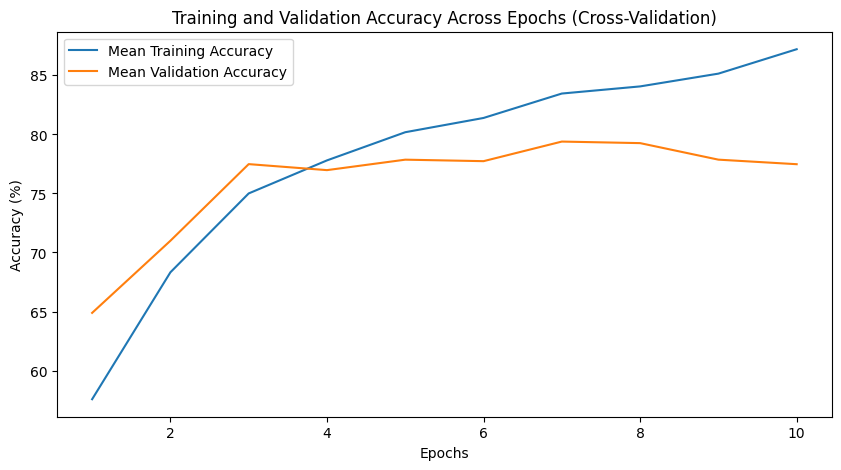

In [6]:
import os
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from torch import nn, optim
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Cargar metadata y definir la carpeta de imágenes
metadata_path = 'C:/Users/maria/OneDrive/Escritorio/ITAM/Mineria/cancer/df_datos.csv'
image_folder = 'C:/Users/maria/OneDrive/Escritorio/ITAM/Mineria/cancer_cropped/'
metadata_df = pd.read_csv(metadata_path)[['isic_id', 'target']]

# Paso 1: Undersampling de la Clase Mayoritaria
metadata_majority = metadata_df[metadata_df['target'] == 0]
metadata_minority = metadata_df[metadata_df['target'] == 1]

# Downsample la clase mayoritaria
metadata_majority_downsampled = resample(
    metadata_majority,
    replace=False,
    n_samples=len(metadata_minority),
    random_state=42
)

# Combinar la clase mayoritaria con la minoritaria
balanced_metadata = pd.concat([metadata_majority_downsampled, metadata_minority])
balanced_metadata = balanced_metadata.sample(frac=1, random_state=42).reset_index(drop=True)

# Clase de Dataset personalizado
class SkinCancerDataset(Dataset):
    def __init__(self, metadata, image_dir, transform=None):
        self.metadata = metadata
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, f"{self.metadata.iloc[idx, 0]}.jpg")
        try:
            image = Image.open(img_name).convert('RGB')
            label = self.metadata.iloc[idx, 1]

            if self.transform:
                image = self.transform(image)

            return image, label
        except FileNotFoundError:
            return None

# Transformaciones de las imágenes
transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Crear dataset balanceado
dataset = SkinCancerDataset(metadata=balanced_metadata, image_dir=image_folder, transform=transform)
dataset = [item for item in dataset if item is not None]  # Filtrar elementos None

# Definir la arquitectura del modelo
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 25 * 25, 128)
        self.fc2 = nn.Linear(128, 2)  # Clasificación binaria

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 25 * 25)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Configuración para cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Listas para almacenar las métricas de cada fold
fold_train_accuracies = []
fold_val_accuracies = []

# Loop de cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    print(f'Fold {fold + 1}/{k_folds}')
    
    # Crear subconjuntos para entrenamiento y validación en el fold actual
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)
    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

    # Inicializar modelo, criterio y optimizador
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 10
    train_accuracies = []
    val_accuracies = []

    # Entrenamiento y validación en el fold actual
    for epoch in range(num_epochs):
        model.train()
        correct_train = 0
        total_train = 0
        running_loss = 0.0

        # Bucle de entrenamiento
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Calcular precisión en entrenamiento
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Bucle de validación
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_accuracy = 100 * correct_val / total_val
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch + 1}, Training Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {val_accuracy:.2f}%")

    # Almacenar las métricas del fold actual
    fold_train_accuracies.append(train_accuracies)
    fold_val_accuracies.append(val_accuracies)

# Promediar las métricas de cada fold y graficar
mean_train_accuracies = np.mean(fold_train_accuracies, axis=0)
mean_val_accuracies = np.mean(fold_val_accuracies, axis=0)

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), mean_train_accuracies, label='Mean Training Accuracy')
plt.plot(range(1, num_epochs + 1), mean_val_accuracies, label='Mean Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy Across Epochs (Cross-Validation)')
plt.legend()
plt.show()